Test de k-médioides sur séries temporelles (Nada)

In [27]:
from scipy.cosinespatial import distance
import numpy as np
import math
import 
spatial.cosine.distance()
#mesure de similarité dtw entre deux séries temporelles. x = un pixel sur un intervalle de temps
def dtw(x, x_prime):
  R=np.zeros((len(x),len(x_prime)))
  for i in range(len(x)):
    for j in range(len(x_prime)):
      R[i, j] = distance.euclidean(x[i], x_prime[j]) ** 2
      if i > 0 or j > 0:
        R[i, j] += min(
          R[i-1, j  ] if i > 0             else math.inf,
          R[i  , j-1] if j > 0             else math.inf,
          R[i-1, j-1] if (i > 0 and j > 0) else math.inf
        )

  return R[-1, -1] ** (1/2)

#pour tester avec le cosin
def dtw2(x, x_prime):
  R=np.zeros((x.shape[0],x_prime.shape[0]))
  for i in range(len(x)):
    for j in range(len(x_prime)):
      R[i, j] = math.cos(x[i], x_prime[j]) ** 2
      if i > 0 or j > 0:
        R[i, j] += min(
          R[i-1, j  ] if i > 0             else math.inf,
          R[i  , j-1] if j > 0             else math.inf,
          R[i-1, j-1] if (i > 0 and j > 0) else math.inf
        )

  return R[-1, -1] ** (1/2)

print(dtw2(data[1],data[2]))


TypeError: math.cos() takes exactly one argument (2 given)

In [7]:


#génération des matrices : 
#data=np.random.rand(5)
sequence1 = np.random.rand(5,1)
sequence2 = np.random.rand(5,1)
sequence3 = np.random.rand(5,1)
sequence4= np.random.rand(5,1)

print(dtw(sequence1,sequence2))
print(sequence1.shape)

0.688290139479207
(5, 1)


In [26]:
# Regrouper les séquences dans une liste
data = [[[1,2,3],[10,23,4],[5,8,9],[4,2,12]], [[1,8,9],[11,14,21],[5,7,8],[3,3,5]], [[1,2,10],[10,3,7],[5,8,19],[4,9,20]]]
#data = [sequence1,sequence2,sequence3,sequence4]
data=np.array(data)
#data=data.reshape((4,6,1))
print(data.shape[0])
print(data)
print(data[1])

#def k_medoids_clustering(data, k, max_iterations=100):
    # Sélectionner les k médioides initiaux
 #   means = np.random.choice(len(data), k, replace=False)

  #  for _ in range(max_iterations):
        # Affectation des points aux means
   #     clusters = [[] for _ in range(k)]
    #    for i, point in enumerate(data):
     #       distances = [dtw(data[m], point)[0] for m in means]
      #      cluster_assignment = np.argmin(distances)
       #     clusters[cluster_assignment].append(i)

        # Mise à jour des means
        #for i in range(k):
         #   cluster_indices = clusters[i]
          #  cluster_points = data[cluster_indices]
           # means_index = min([(idx, np.sum([dtw(data[m], data[idx])[0] for m in cluster_indices]))
            #                    for idx in cluster_indices], key=lambda x: x[1])[0]
            #medoids[i] = medoid_index

        # Convertir les indices des clusters en points réels
    #clustered_points = [[data[i] for i in cluster_indices] for cluster_indices in clusters]

    #return clustered_points, medoids


#result_clustered_points,results_medoids=k_medoids_clustering(data,k=3)
#print(data)

# Afficher les points dans chaque cluster
#for i, cluster in enumerate(result_clustered_points):
 #   print(f"Cluster {i + 1}: {cluster}")

3
[[[ 1  2  3]
  [10 23  4]
  [ 5  8  9]
  [ 4  2 12]]

 [[ 1  8  9]
  [11 14 21]
  [ 5  7  8]
  [ 3  3  5]]

 [[ 1  2 10]
  [10  3  7]
  [ 5  8 19]
  [ 4  9 20]]]
[[ 1  8  9]
 [11 14 21]
 [ 5  7  8]
 [ 3  3  5]]


In [9]:
import numpy as np
 
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances=np.zeros((len(x),k))
    for i in range(len(x)):
            for j in range(len(centroids)):
                    distances[i,j]=(dtw(x[i], centroids[j])) #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    # Repeating the above steps for a defined number of iterations
    # Step 4
    for _ in range(no_of_iterations):
        centroids = []
        for idx in range(k):
            # Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points == idx].mean(axis=0)
            centroids.append(temp_cent)

        centroids = np.vstack(centroids)  # Updated Centroids
    
    distances=np.zeros((len(x),k))
    for i in range(len(x)):
            for j in range(len(centroids)):
                    distances[i,j]=(dtw(x[i], centroids[j])) 

    points = np.array([np.argmin(i) for i in distances])
         
    return points 

In [10]:
# Function to implement steps given in the previous section
def kmeans2(x, k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #print(x)

    # Randomly choosing Centroids 
    #centroids = x[idx, :]  # Step 1
    centroids = np.array([[1,1,1,1,1,1],[1,4,5,7,8,8],[10,1,2,5,7,9]])
    centroids=centroids.reshape((3,6,1))

    for _ in range(no_of_iterations):
        # Finding the distance between centroids and all the data points
        distances = np.zeros((len(x), k))
        for i in range(len(x)):
            for j in range(len(centroids)):
                distances[i, j] = dtw(x[i], centroids[j])  # Step 2
        print("distances:",distances)

        # Centroid with the minimum Distance
        points = np.array([np.argmin(i) for i in distances])  # Step 3, on a le numéro de centroid de chaque point
        #print("points:",points)
        # Updating Centroids by taking the mean of the Cluster it belongs to
        centroids = np.array([x[points == idx].mean(axis=0) for idx in range(k)])  # Updated Centroids, on fait la moyenne

    for i in range(0,k):
        print("Cluster",i,":")
        for j in points:
            if (j==i):
                print(x[j])
                

    return points


print(kmeans2(data,3,50))





distances: [[10.53565375 10.19803903 12.92284798]
 [12.489996    8.1240384  10.39230485]
 [ 9.94987437 12.88409873 13.45362405]
 [15.96871942 12.9614814  11.        ]]
distances: [[ 3.16227766  2.64575131  9.94987437]
 [ 5.56776436  2.78388218 11.78982612]
 [ 0.          3.70809924  9.64365076]
 [ 9.64365076 10.63014581  0.        ]]
distances: [[ 3.16227766  2.64575131  9.94987437]
 [ 5.56776436  2.78388218 11.78982612]
 [ 0.          3.70809924  9.64365076]
 [ 9.64365076 10.63014581  0.        ]]
distances: [[ 3.16227766  2.64575131  9.94987437]
 [ 5.56776436  2.78388218 11.78982612]
 [ 0.          3.70809924  9.64365076]
 [ 9.64365076 10.63014581  0.        ]]
distances: [[ 3.16227766  2.64575131  9.94987437]
 [ 5.56776436  2.78388218 11.78982612]
 [ 0.          3.70809924  9.64365076]
 [ 9.64365076 10.63014581  0.        ]]
distances: [[ 3.16227766  2.64575131  9.94987437]
 [ 5.56776436  2.78388218 11.78982612]
 [ 0.          3.70809924  9.64365076]
 [ 9.64365076 10.63014581  0.   

In [ ]:
print(data)

[[[ 1]
  [10]
  [ 5]
  [ 4]
  [ 3]
  [ 2]]

 [[ 1]
  [11]
  [ 5]
  [ 3]
  [ 1]
  [ 7]]

 [[ 1]
  [10]
  [ 5]
  [ 0]
  [ 1]
  [ 2]]

 [[10]
  [ 9]
  [ 8]
  [ 7]
  [ 6]
  [ 1]]]


***TEST SUR DES PIXELS***

In [17]:
from selection_pixels_dtw import *
import os
import cv2
from PIL import Image
import rasterio as rio
import math
import matplotlib as plt
import matplotlib.pyplot as plt


In [18]:

# List of target pixels
pixels_de_interet = pix_danone + pix_agri + pix_ensta + pix_apt + pix_lac + pix_foret
len(pixels_de_interet)


54

In [19]:

dir = "../../ressources/images"
images_list = os.listdir(dir)
line = 0
matrice = np.zeros((len(pixels_de_interet), len(images_list)))
for image in images_list:
    with rio.open(dir+'/'+image, 'r') as ds:
        # arr = ds.read()
        # band1 = raster.read(1)
        # band2 = raster.read(2)
        band3 = ds.read(3)
        # band4 = raster.read(4)
    # Extraction of target pixels
    for pixel,j in zip(pixels_de_interet, range(len(pixels_de_interet)-1)):
        pass
        matrice[j,line] = band3[pixel[0], pixel[1]]
    line +=1     
        

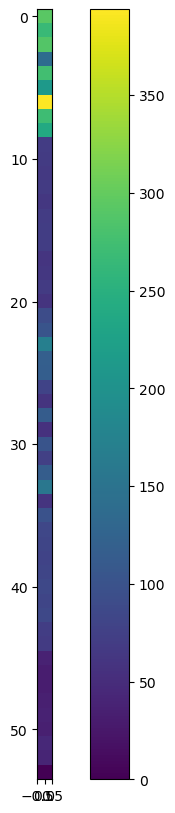

In [15]:
#Looking for a pixel
img = (matrice/8).astype(int)
#grayImage = cv2.cvtColor(uint_img, cv2.COLOR_GRAY2BGR)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.colorbar()
plt.show()

In [ ]:
yhat = kmeans(matrice,6,200)

import collections
def affichage(yhat,pix_interet):
    name = ''
    dico = collections.Counter(yhat)
    for key in list(dico.keys()):
        dico[key] = [f'number of vectors = {dico[key]}'] 
        for index,pos in zip(yhat,range(len(yhat))):
            if index == key:
                if 0<=pos<=8: name = 'pix_danone'
                elif 9<=pos<=17: name = 'pix_agri'
                elif 18<=pos<=26: name = 'pix_ensta'
                elif 27<=pos<=35: name = 'pix_apt'
                elif 36<=pos<=44: name = 'pix_lac'
                elif 45<=pos<=53: name = 'pix_apt'

                dico[key].append(f'{pix_interet[pos]}:{name}')

    for key in dico:
        print(f'cluster numero {key}:\n-------------------------------')
        for part in dico[key]:
            print(f'{part}')
        print('-------------------------------')


affichage(yhat,pixels_de_interet)
